## 따릉이 데이터를 활용한 데이터 분석

- 각 날짜의 1시간 전의 기상상황을 가지고 1시간 후의 따릉이 대여수를 예측해보세요. 

## 1. 라이브러리 및 데이터
## Library & Data

In [2]:
import pandas as pd #판다스 패키지 불러오기
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor #랜덤 포레스트 불러오기

In [3]:
# 데이터 불러오기
train = pd.read_csv('data/train.csv')# 모델 학습 파일
test = pd.read_csv('data/test.csv')# 모델 시험지 파일
submission = pd.read_csv('data/submission.csv')#답안지 파일 

## 2. 탐색적 자료분석
## Exploratory Data Analysis (EDA)


### pd.DataFrame.head()
 - 데이터 프레임의 위에서 부터 n개 행을 보여주는 함수
 - n의 기본 값(default 값)은 5

In [4]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


+ id : 날짜와 시간별 id
+ hour_bef_temperature : 1시간 전 기온
+ hour_bef_precipitation : 1시간 전 비 정보, 비가 오지 않았으면 0, 비가 오면 1
+ hour_bef_windspeed : 1시간 전 풍속(평균)
+ hour_bef_humidity : 1시간 전 습도
+ hour_bef_visibility : 1시간 전 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
+ hour_bef_ozone : 1시간 전 오존
+ hour_bef_pm10 : 1시간 전 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
+ hour_bef_pm2.5 : 1시간 전 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
+ count : 시간에 따른 따릉이 대여 수 

In [5]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [6]:
submission.head()

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN


### pd.DataFrame.tail()
 - 데이터 프레임의 아래에서 부터 n개 행을 보여주는 함수
 - n의 기본 값(default 값)은 5

In [7]:
train.tail()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0
1458,2179,17,21.1,0.0,3.1,47.0,1973.0,0.046,38.0,17.0,170.0


### pd.DataFrame.shape
 - 데이터 프레임의 행의 개수와 열의 개수가 저장되어 있는 속성(attribute)

In [8]:
train.shape

(1459, 11)

In [9]:
test.shape

(715, 10)

In [10]:
submission.shape

(715, 2)

### pd.DataFrame.info()
- 데이터셋의 column별 정보를 알려주는 함수
- 비어 있지 않은 값은 (non-null)은 몇개인지?
- column의 type은 무엇인지?
 - type의 종류 : int(정수), float(실수), object(문자열), 등등 (date, ...)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


### pd.DataFrame.describe()
- 숫자형 (int, float) column들의 기술 통계량을 보여주는 함수

- 기술통계량이란?
 - 해당 column을 대표할 수 있는 통계값들을 의미
 
 
- 기술통계량 종류
 - count: 해당 column에서 비어 있지 않은 값의 개수
 - mean: 평균
 - std: 표준편차
 - min: 최솟값 (이상치 포함)
 - 25% (Q1): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 1/4번째 지점에 있는 값
 - 50% (Q2): 중앙값 (전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 2/4번째 지점에 있는 값)
 - 75% (Q3): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 3/4번째 지점에 있는 값
 - max: 최댓값 (이상치 포함) 
 
 
 
- 이상치: 울타리 밖에 있는 부분을 이상치라고 정의함
   - 아래쪽 울타리: $Q_1$ - $1.5 * IQR$
   - 위쪽 울타리: $Q_3$ + $1.5 * IQR$
   - $IQR$ = $Q_3 - Q_1$
 
 
<img src="https://miro.medium.com/max/10125/1*NRlqiZGQdsIyAu0KzP7LaQ.png" width="700" height="500">

In [12]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


### pd.DataFrame.groupby()
 - 집단에 대한 통계량 확인 
 
<img src="https://s3.amazonaws.com/files.dezyre.com/images/Tutorials/Split+Apply+Combine+Strategy.png" width="700" height="500">

In [13]:
train[['hour','count']].groupby('hour').mean()

,count
hour,
0,71.766667
1,47.606557
2,31.409836
3,21.377049
4,13.524590
5,13.114754
6,24.557377
7,62.360656
8,136.688525


In [14]:
import matplotlib.pyplot as plt

### plt.plot()의 스타일

색깔

|문자열|약자|
|----|-----|
|blue|b|
|green|g|
|red|r|
|cyan|c|
|magenta|m|
|yellow|y|
|black|k|
|white|w|

마커

|마커|의미|
|----|----|
|.|점|
|o|원|
|v|역삼각형|
|^|삼각형|
|s|사각형|
|*|별|
|x|엑스|
|d|다이아몬드|

선

|문자열|의미|
|-----|-----|
| - | 실선|
|-- | 끊어진 실선|
| -.| 점+실선|
|:|점선|

In [15]:
import matplotlib.pyplot as plt

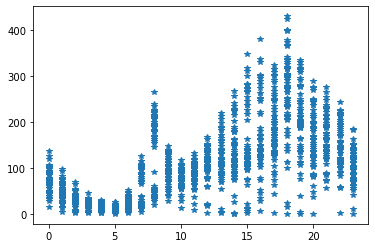

In [16]:
plt.plot('hour', 'count', '*', data = train)

In [17]:
train.columns

Index(['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count'],
      dtype='object')

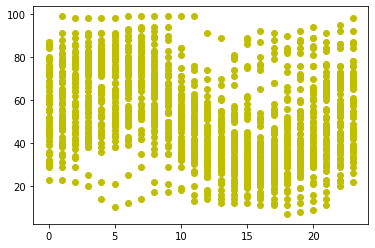

In [18]:
plt.plot('hour', 'hour_bef_humidity', 'yo', data = train)

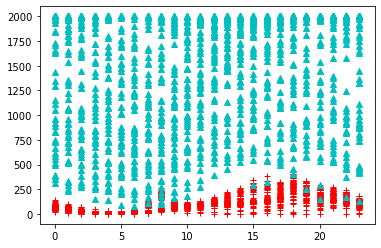

In [19]:
plt.plot('hour', 'count', 'r+', data = train)
plt.plot('hour', 'hour_bef_visibility', 'c^', data = train)

### plt.title(label, fontsize)
- 그래프 제목 생성

### plt.xlabel(label, fontsize)
- x축 이름 설정

### plt.ylabel(label, fontsize)
- y축 이름 설정

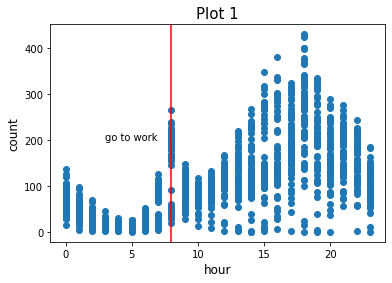

In [20]:
plt.title('Plot 1', fontsize = 15)
plt.plot('hour', 'count', 'o', data = train)
plt.xlabel('hour', fontsize = 12)
plt.ylabel('count', fontsize = 12)
plt.axvline(8, color = 'red')
plt.text(3, 200, 'go to work', fontsize = 10)
plt.savefig('plot1.png')

### plt.axvline(x, color)
- 축을 가로지르는 세로 선 생성

### plt.text(x, y, s, fontsize)
- 원하는 위치에 텍스트 생성

### 상관계수

- 상관계수: 두 개의 변수가 같이 일어나는 강도를 나타내는 수치 
- -1에서 1사이의 값을 지닙니다. 
- -1이나 1인 수치는 현실 세계에서 관측되기 힘든 수치입니다. 
- 분야별로 기준을 정하는 것에 따라 달라지겠지만, 보통 0.4이상이면 두 개의 변수간에 상관성이 있다고 얘기합니다. 

![상관계수](https://t1.daumcdn.net/cfile/tistory/99DEE1425C6A9F2008)

- 상관관계는 인과관계와 다릅니다. 아래의 예시를 확인해 봅시다.

![상관성 예시](https://miro.medium.com/max/684/1*JLYI5eCVEN7ZUWXBIrrapw.png)

- 선글라스 판매량이 증가함에 따라, 아이스크림 판매액도 같이 증가하는 것을 볼 수 있습니다. 
- 하지만 선글라스 판매량이 증가했기 **때문에** 아이스크림 판매액이 증가했다라고 해석하는 것은 타당하지 않습니다. 
- 선글라스 판매량이 증가했다는 것은 여름 때문이라고 볼 수 있으므로, 날씨가 더워짐에 따라 선글라스 판매량과 아이스크림 판매액이 같이 증가했다고 보는 것이 타당할 것입니다. 

### pd.DataFrame.corr()

- correlation coefficient 의 줄임말 입니다 

In [21]:
train.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010901,-0.000029,-0.056267,-0.003353,-0.017948,0.008950,0.055234,-0.025510,0.003545,-0.002131
hour,-0.010901,1.000000,0.407306,0.021646,0.462797,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.626047
hour_bef_temperature,-0.000029,0.407306,1.000000,-0.097056,0.375618,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404
hour_bef_precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022746,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985
hour_bef_windspeed,-0.003353,0.462797,0.375618,0.022746,1.000000,-0.433012,0.252092,0.520526,0.010176,-0.199113,0.459906
hour_bef_humidity,-0.017948,-0.329612,-0.496088,0.276481,-0.433012,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142
hour_bef_visibility,0.008950,0.176491,0.197417,-0.217155,0.252092,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094
hour_bef_ozone,0.055234,0.390188,0.541228,-0.062461,0.520526,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614
hour_bef_pm10,-0.025510,-0.035907,-0.003830,-0.051266,0.010176,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288
hour_bef_pm2.5,0.003545,-0.061229,-0.078665,0.004742,-0.199113,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293


In [22]:
import seaborn as sns

<AxesSubplot:>

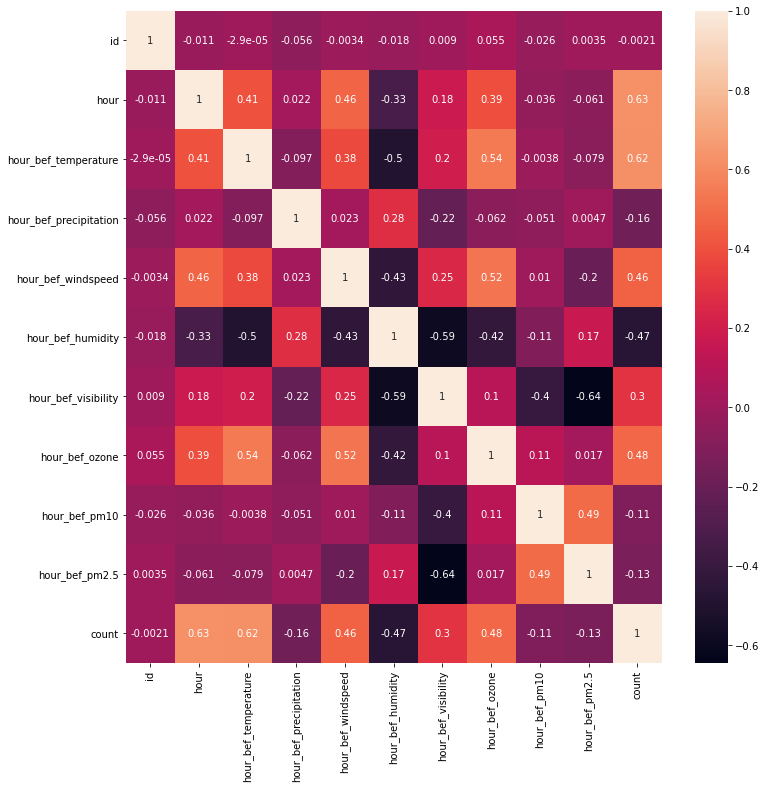

In [23]:
plt.figure(figsize = (12, 12))
sns.heatmap(train.corr(), annot = True)

### sns.lmplot()

In [24]:
import seaborn as sns

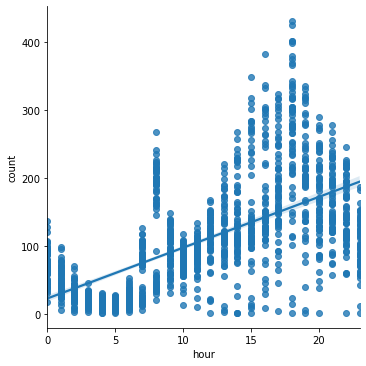

In [25]:
sns.lmplot(x = 'hour', y = 'count', data = train)

### sns.kdeplot()

<AxesSubplot:ylabel='Frequency'>

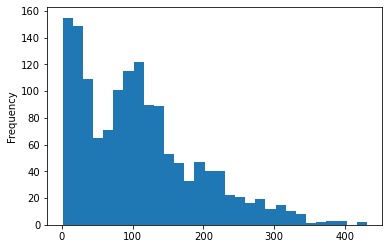

In [26]:
train['count'].plot(kind = 'hist', bins = 30)

<AxesSubplot:xlabel='count', ylabel='Density'>

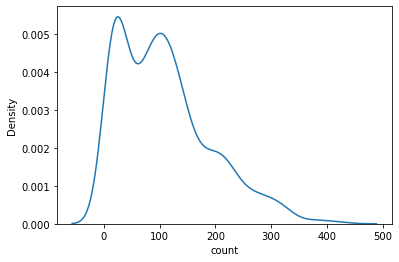

In [27]:
sns.kdeplot(train['count'])

### sns.boxplot()

<AxesSubplot:xlabel='hour', ylabel='hour_bef_humidity'>

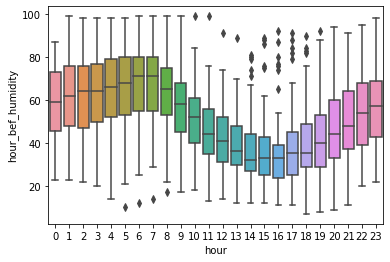

In [28]:
sns.boxplot(x = 'hour', y = 'hour_bef_humidity', data = train)

### sns.pairplot()

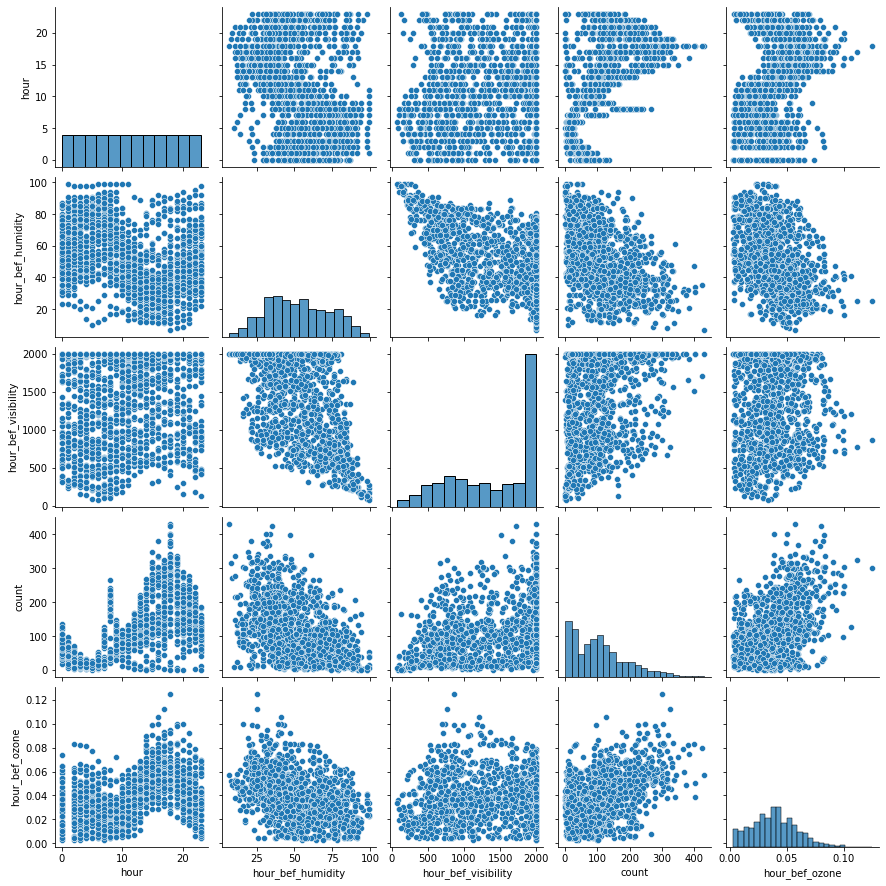

In [29]:
sns.pairplot(train[['hour', 'hour_bef_humidity', 'hour_bef_visibility', 'count', 'hour_bef_ozone']])

### sns.jointplot()

/home/peb/anaconda3/envs/aiffel/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


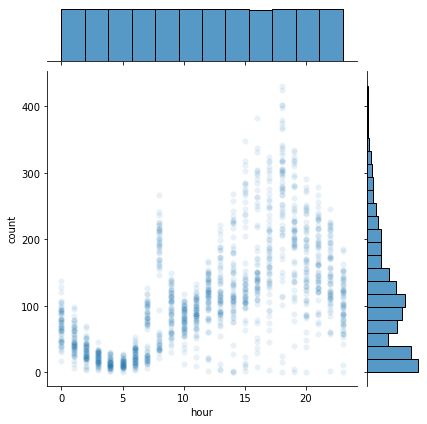

In [30]:
sns.jointplot('hour', 'count', data = train, alpha = 0.1)

### sns.violinplot()

<AxesSubplot:xlabel='hour', ylabel='hour_bef_humidity'>

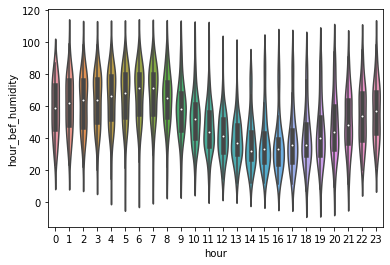

In [31]:
sns.violinplot(x = 'hour', y = 'hour_bef_humidity', data = train)

### sns.relplot()

In [32]:
train[train['hour'] > 12]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
7,16,21,16.0,0.0,6.0,21.0,1961.0,0.050,90.0,28.0,146.0
...,...,...,...,...,...,...,...,...,...,...,...
1448,2168,19,10.6,0.0,0.8,84.0,1091.0,0.033,23.0,22.0,114.0
1450,2170,15,23.1,0.0,4.3,23.0,1798.0,0.064,54.0,29.0,266.0
1453,2173,18,24.8,0.0,3.6,33.0,1262.0,0.084,113.0,49.0,303.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


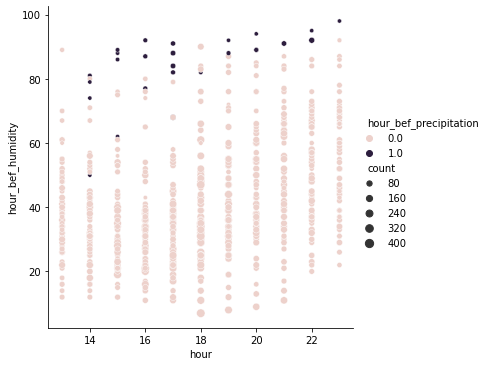

In [33]:
sns.relplot(x = 'hour', y = 'hour_bef_humidity', hue = 'hour_bef_precipitation', size = 'count', data = train[train['hour'] > 12])

## 3. 데이터 전처리
## Data Cleansing & Pre-Processing  

### pd.Series.isna()
- 결측치 여부를 확인해줍니다.
- 결측치면 True, 아니면 False

In [34]:
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

### pd.DataFrame.fillna()
- 결측치를 채우고자 하는 column과 결측치를 대신하여 넣고자 하는 값을 명시해주어야 합니다.

In [35]:
train['hour_bef_temperature'] = train['hour_bef_temperature'].fillna(value = train['hour_bef_temperature'].mean())

In [36]:
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [37]:
train_isna_sum = train.isna().sum()

In [38]:
train_isna_sum[train_isna_sum != 0].index

Index(['hour_bef_precipitation', 'hour_bef_windspeed', 'hour_bef_humidity',
       'hour_bef_visibility', 'hour_bef_ozone', 'hour_bef_pm10',
       'hour_bef_pm2.5'],
      dtype='object')

In [39]:
na_columns = train_isna_sum[train_isna_sum != 0].index

In [40]:
def fill_bicycle_na(df, column) :
    
    df[column] = df[column].fillna(value = df[column].mean())

In [41]:
fill_bicycle_na(train, 'hour_bef_precipitation')

In [42]:
for col in na_columns:
    
    fill_bicycle_na(train, col)
    
    print(col, '결측값 대체 완료')

hour_bef_precipitation 결측값 대체 완료
hour_bef_windspeed 결측값 대체 완료
hour_bef_humidity 결측값 대체 완료
hour_bef_visibility 결측값 대체 완료
hour_bef_ozone 결측값 대체 완료
hour_bef_pm10 결측값 대체 완료
hour_bef_pm2.5 결측값 대체 완료


In [43]:
test_isna_sum = test.isna().sum()

In [44]:
test_na_columns = test_isna_sum[test_isna_sum != 0].index

In [45]:
for col in test_na_columns:
    print(col)

hour_bef_temperature
hour_bef_precipitation
hour_bef_windspeed
hour_bef_humidity
hour_bef_visibility
hour_bef_ozone
hour_bef_pm10
hour_bef_pm2.5


In [46]:
for col in test_na_columns:
    fill_bicycle_na(test, col)
    print(col, '대체 완료')

hour_bef_temperature 대체 완료
hour_bef_precipitation 대체 완료
hour_bef_windspeed 대체 완료
hour_bef_humidity 대체 완료
hour_bef_visibility 대체 완료
hour_bef_ozone 대체 완료
hour_bef_pm10 대체 완료
hour_bef_pm2.5 대체 완료


In [47]:
test.isna().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64

## 4. 변수 선택 및 모델 구축
## Feature Engineering & Initial Modeling  

### sklearn.neighbors.KNeighborsRegressor()
- KNN 모형

![](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png)

In [56]:
import numpy as np

In [48]:
from sklearn.neighbors import KNeighborsRegressor

In [49]:
from sklearn.model_selection import KFold

In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_jobs = -1)

In [52]:
column = ['hour', 'hour_bef_temperature']
X_train = train[column]
y_train = train['count']
X_test = test[column]

In [53]:
model_5 = KNeighborsRegressor(n_jobs = -1, n_neighbors = 5)
model_7 = KNeighborsRegressor(n_jobs = -1, n_neighbors = 7)
model_9 = KNeighborsRegressor(n_jobs = -1, n_neighbors = 9)

In [54]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 10)

In [57]:
np.mean(cross_val_score(model_5, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error'))

-2154.4346238290263

In [58]:
np.mean(cross_val_score(model_7, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error'))

-2059.3699019701085

In [59]:
np.mean(cross_val_score(model_9, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error'))

-1993.3584133742238

In [60]:
model_9.fit(X_train, y_train)

KNeighborsRegressor(n_jobs=-1, n_neighbors=9)

In [61]:
submission['count'] = model_9.predict(X_test)

In [62]:
submission.to_csv('knn_9.csv', index = False)

In [63]:
model.fit(X_train, y_train)

KNeighborsRegressor(n_jobs=-1)

In [64]:
submission['count'] = model.predict(X_test)

In [65]:
submission.to_csv('knn_5.csv', index = False)

In [66]:
train

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


### sklearn.ensemble.RandomForestRegressor()
- 랜덤 포레스트 모형

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/rfc_vs_dt1.png)

In [67]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [68]:
train

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


In [69]:
X_train = train.drop(['id', 'count'], axis = 1)
y_train = train['count']
X_test = test.drop('id', axis = 1)

In [70]:
X_train.shape, y_train.shape, X_test.shape

((1459, 9), (1459,), (715, 9))

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
RandomForestRegressor()

RandomForestRegressor()

In [73]:
param = {'min_samples_split': [30, 50, 70],
        'max_depth': [5, 6, 7],
        'n_estimators': [50, 150, 250]}

In [74]:
param

{'min_samples_split': [30, 50, 70],
 'max_depth': [5, 6, 7],
 'n_estimators': [50, 150, 250]}

In [75]:
gs = GridSearchCV(estimator=model, param_grid=param, scoring = 'neg_mean_squared_error', cv = 3)

In [76]:
gs

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 6, 7],
                         'min_samples_split': [30, 50, 70],
                         'n_estimators': [50, 150, 250]},
             scoring='neg_mean_squared_error')

In [77]:
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 6, 7],
                         'min_samples_split': [30, 50, 70],
                         'n_estimators': [50, 150, 250]},
             scoring='neg_mean_squared_error')

In [78]:
submission['count'] = gs.predict(X_test)

In [79]:
submission.to_csv('gridsearch.csv', index = False)

In [80]:
gs.best_params_

{'max_depth': 7, 'min_samples_split': 30, 'n_estimators': 150}

In [81]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.089528,0.011779,0.004635,0.000203,5,30,50,"{'max_depth': 5, 'min_samples_split': 30, 'n_e...",-2064.992739,-1787.848980,-1783.972661,-1878.938127,131.569995,8
1,0.246940,0.006766,0.010870,0.000386,5,30,150,"{'max_depth': 5, 'min_samples_split': 30, 'n_e...",-2092.398936,-1801.877730,-1771.704539,-1888.660402,144.590567,11
2,0.411445,0.020841,0.017229,0.001023,5,30,250,"{'max_depth': 5, 'min_samples_split': 30, 'n_e...",-2102.789048,-1785.784958,-1765.110653,-1884.561553,154.540796,10
3,0.079428,0.001701,0.004508,0.000275,5,50,50,"{'max_depth': 5, 'min_samples_split': 50, 'n_e...",-2202.154152,-1893.844858,-1832.271579,-1976.090196,161.815741,18
4,0.231417,0.001250,0.010420,0.000166,5,50,150,"{'max_depth': 5, 'min_samples_split': 50, 'n_e...",-2186.999092,-1855.711160,-1785.386467,-1942.698906,175.115821,17
5,0.388589,0.006852,0.016671,0.000466,5,50,250,"{'max_depth': 5, 'min_samples_split': 50, 'n_e...",-2158.000620,-1811.182583,-1817.514243,-1928.899149,162.019825,16
6,0.076594,0.001038,0.004502,0.000211,5,70,50,"{'max_depth': 5, 'min_samples_split': 70, 'n_e...",-2258.487738,-1949.471440,-1859.280866,-2022.413348,170.942336,27
7,0.230524,0.010298,0.010304,0.000072,5,70,150,"{'max_depth': 5, 'min_samples_split': 70, 'n_e...",-2281.690759,-1899.245410,-1829.869812,-2003.601994,198.667670,26
8,0.372417,0.005599,0.016397,0.000105,5,70,250,"{'max_depth': 5, 'min_samples_split': 70, 'n_e...",-2274.195382,-1884.266781,-1842.785467,-2000.415877,194.330625,24
9,0.086351,0.000821,0.004466,0.000110,6,30,50,"{'max_depth': 6, 'min_samples_split': 30, 'n_e...",-2023.574147,-1705.715996,-1727.924911,-1819.071685,144.889042,6


In [82]:
from sklearn.model_selection import RandomizedSearchCV

In [83]:
param = {'min_samples_split': range(30, 70),
        'max_depth': [5, 6, 7],
        'n_estimators': range(50, 250)}

In [84]:
model = RandomForestRegressor()

In [85]:
rs = RandomizedSearchCV(estimator=model, param_distributions=param, n_iter = 30, random_state=0, scoring = 'neg_mean_squared_error', n_jobs = -1)

In [75]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [5, 6, 7],
                                        'min_samples_split': range(30, 70),
                                        'n_estimators': range(50, 250)},
                   random_state=0, scoring='neg_mean_squared_error')

In [76]:
rs.best_params_

{'n_estimators': 171, 'min_samples_split': 34, 'max_depth': 7}

In [81]:
submission['count'] = rs.predict(X_test)

In [82]:
submission.to_csv('randomsearch.csv', index = False)

In [79]:
pd.DataFrame(rs.cv_results_).sort_values('mean_test_score', ascending = False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
21,0.663026,0.018534,0.024135,4.203040e-03,171,34,7,"{'n_estimators': 171, 'min_samples_split': 34,...",-1672.709645,-1948.602733,-1598.407249,-1801.767210,-1500.507150,-1704.398797,156.796929,1
16,0.502057,0.003253,0.017354,1.016859e-03,139,35,7,"{'n_estimators': 139, 'min_samples_split': 35,...",-1695.880384,-1990.971084,-1562.977708,-1839.429735,-1528.357965,-1723.523375,172.968867,2
29,0.290821,0.017612,0.007979,1.669095e-03,80,42,7,"{'n_estimators': 80, 'min_samples_split': 42, ...",-1709.482322,-1984.210969,-1610.736139,-1885.654738,-1487.544613,-1735.525756,180.071321,3
17,0.819807,0.014993,0.025133,3.988743e-04,233,44,7,"{'n_estimators': 233, 'min_samples_split': 44,...",-1728.837681,-2005.061097,-1605.394153,-1845.768137,-1529.521939,-1742.916601,169.673862,4
2,0.302191,0.013630,0.010572,4.885388e-04,95,39,6,"{'n_estimators': 95, 'min_samples_split': 39, ...",-1726.485248,-2008.932023,-1660.663971,-1843.033453,-1516.095288,-1751.041997,166.697853,5
3,0.308375,0.005062,0.010771,3.989459e-04,98,48,7,"{'n_estimators': 98, 'min_samples_split': 48, ...",-1737.031222,-2010.369703,-1595.730505,-1885.474687,-1548.597047,-1755.440633,173.509761,6
19,0.201261,0.004820,0.007979,2.861023e-07,56,43,7,"{'n_estimators': 56, 'min_samples_split': 43, ...",-1748.562425,-2029.417809,-1612.114106,-1861.111137,-1529.417600,-1756.124615,177.709664,7
6,0.236567,0.008112,0.009575,1.196766e-03,75,36,6,"{'n_estimators': 75, 'min_samples_split': 36, ...",-1724.576186,-2007.947028,-1648.369018,-1864.456310,-1550.908744,-1759.251457,161.134431,8
14,0.334904,0.007735,0.011370,4.887723e-04,102,49,7,"{'n_estimators': 102, 'min_samples_split': 49,...",-1747.755439,-2016.918133,-1628.170917,-1881.019721,-1549.334974,-1764.639837,168.791972,9
18,0.603585,0.007863,0.020346,7.981897e-04,177,41,6,"{'n_estimators': 177, 'min_samples_split': 41,...",-1741.136404,-2028.800308,-1643.719733,-1875.360409,-1537.387188,-1765.280808,172.543093,10


In [185]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [187]:
submission['count'] = model.predict(X_test)

In [189]:
submission.to_csv('rf_default.csv', index = False)

In [197]:
model_100 = RandomForestRegressor(n_estimators=100, n_jobs = -1, random_state=10)
model_200 = RandomForestRegressor(n_estimators=200, n_jobs = -1, random_state=10)
model_300 = RandomForestRegressor(n_estimators=300, n_jobs = -1, random_state=10)
model_500 = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state=10)

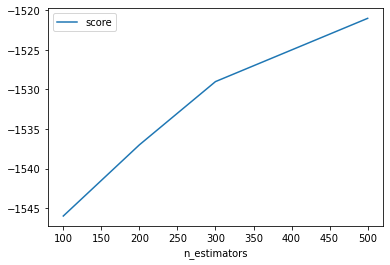

In [205]:
pd.DataFrame({'n_estimators':[100, 200, 300, 500], 'score':[-1546, -1537, -1529, -1521]}).plot('n_estimators', 'score')

In [198]:
%%time
score = cross_val_score(model_100, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

-1546.8865621858963
Wall time: 562 ms


In [199]:
%%time
score = cross_val_score(model_200, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

-1537.2335820896296
Wall time: 994 ms


In [200]:
%%time
score = cross_val_score(model_300, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

-1529.93820386781
Wall time: 1.42 s


In [201]:
%%time
score = cross_val_score(model_500, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

-1521.7993785402248
Wall time: 2.35 s


In [207]:
model_sam_30 = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state=10, min_samples_split=30)
model_sam_50 = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state=10, min_samples_split=50)
model_sam_100 = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state=10, min_samples_split=100)

In [208]:
%%time
score = cross_val_score(model_sam_30, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

-1647.5599150463906
Wall time: 3.07 s


In [209]:
%%time
score = cross_val_score(model_sam_50, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

-1746.5733867422452
Wall time: 1.99 s


In [210]:
%%time
score = cross_val_score(model_sam_100, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

-2009.2340561302196
Wall time: 1.83 s


In [211]:
final_model = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state=10, min_samples_split=30)

In [212]:
final_model.fit(X_train, y_train)

RandomForestRegressor(min_samples_split=30, n_estimators=500, n_jobs=-1,
                      random_state=10)

In [214]:
submission['count'] = final_model.predict(X_test)

In [215]:
submission.to_csv('estimators_500_samples_30.csv', index = False)

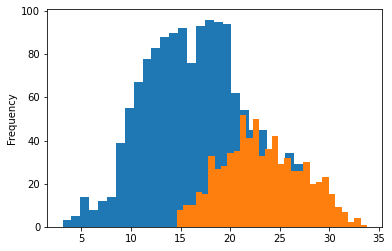

In [227]:
train['hour_bef_temperature'].plot(bins = 30, kind = 'hist')
test['hour_bef_temperature'].plot(bins = 30, kind = 'hist')

In [228]:
rf_maxf_02 = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state=10, min_samples_split=30, max_features=0.2)
rf_maxf_04 = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state=10, min_samples_split=30, max_features=0.4)
rf_maxf_06 = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state=10, min_samples_split=30, max_features=0.6)
rf_maxf_08 = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state=10, min_samples_split=30, max_features=0.8)

In [229]:
%%time
score = cross_val_score(rf_maxf_02, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

-2253.430187736337
Wall time: 2.94 s


In [230]:
%%time
score = cross_val_score(rf_maxf_04, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

-1830.923118087825
Wall time: 1.79 s


In [231]:
%%time
score = cross_val_score(rf_maxf_06, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

-1714.0867530230257
Wall time: 1.85 s


In [232]:
%%time
score = cross_val_score(rf_maxf_08, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

-1673.7873632042495
Wall time: 2.02 s


## 5. 모델 학습 및 검증
## Model Tuning & Evaluation

### model.fit()
- 모델 학습

### model.predict()
- 모델 예측

### pd.DataFrame.to_csv()
 - csv파일 저장하는 함수

## 교차검증 소개: Cross Validation(CV)

### 홀드아웃 교차검증기법(Hold-out Cross Validation)

![](https://www.datavedas.com/wp-content/uploads/2018/04/image003.jpg)

In [122]:
from sklearn.model_selection import train_test_split

In [125]:
column = ['hour', 'hour_bef_temperature']
X_train = train[column]
y_train = train['count']

In [126]:
X_train.shape, y_train.shape

((1459, 2), (1459,))

In [127]:
1459 * 0.25

364.75

> `train_test_split(특징데이터, 타겟데이터, test_size= 0.25, shuffle= True, random_state= 1)`
- 특징데이터와 타겟데이터를 순서대로 넣어줍니다
- test_size: 분할할 검증용데이터 사이즈를 설정합니다(0~1)
- shuffle: 데이터를 섞습니다 <span style='color:red'> <- 순서가 중요한 데이터가 아니라면 언제나 True!</span>
- random_state: 재구현을 위해 시드값을 넣어줍니다

In [128]:
X_trn, X_val, y_trn, y_val = train_test_split(X_train, y_train, test_size = 0.25, shuffle = True, random_state = 10)

In [129]:
X_trn.shape, X_val.shape, y_trn.shape, y_val.shape

((1094, 2), (365, 2), (1094,), (365,))

### K폴드 교차검증기법(K-fold Cross Validation)

![](https://www.researchgate.net/profile/Fabian_Pedregosa/publication/278826818/figure/fig10/AS:614336141750297@1523480558954/The-technique-of-KFold-cross-validation-illustrated-here-for-the-case-K-4-involves.png)

In [131]:
from sklearn.model_selection import KFold

> `KFold(n_splits= , shuffle= , random_state= 1)`
- n_splits: 몇 폴드로 데이터를 분할할지 결정합니다
- shuffle: 데이터를 셔플할지 여부를 결정합니다
- random_state: 재현을 위해 시드값을 고정합니다

이번 검증에는 10개의 분할된 폴드를 활용한 검증을 합니다.  
다음과 같이 반복문을 이용하여 정확도를 구해봅시다.

In [ ]:
kfolds = KFold(n_splits=10, shuffle = True, random_state=10)

> ``` for idx_trn, idx_val in kfolds.split(X_trn):
    train_X, valid_X = X_trn.iloc[idx_trn, :], X_trn.iloc[idx_val, :] 
    train_y, valid_y = y_trn.iloc[idx_trn], y_trn.iloc[idx_val]```
 - `k폴드.split()`함수를 통해 각 분할로 나누어진 샘플들의 <span style="color:red">인덱스</span>에 접근합니다.

In [143]:
kfolds = KFold(n_splits=5, shuffle = True, random_state=5)

In [138]:
import numpy as np

In [139]:
example = np.array([[0,0],
[1,1],
[2,2],
[3,3],
[4,4],
[10,10],
[11,11],
[12,12],
[13,13],
[14,14]])

In [144]:
for idx_trn, idx_val in kfolds.split(example):
    print('TRAIN')
    print(example[idx_trn])
    print('VALIDATION')
    print(example[idx_val])

TRAIN
[[ 0  0]
 [ 1  1]
 [ 2  2]
 [ 3  3]
 [ 4  4]
 [11 11]
 [12 12]
 [13 13]]
VALIDATION
[[10 10]
 [14 14]]
TRAIN
[[ 0  0]
 [ 1  1]
 [ 3  3]
 [10 10]
 [11 11]
 [12 12]
 [13 13]
 [14 14]]
VALIDATION
[[2 2]
 [4 4]]
TRAIN
[[ 0  0]
 [ 2  2]
 [ 3  3]
 [ 4  4]
 [10 10]
 [11 11]
 [13 13]
 [14 14]]
VALIDATION
[[ 1  1]
 [12 12]]
TRAIN
[[ 1  1]
 [ 2  2]
 [ 3  3]
 [ 4  4]
 [10 10]
 [11 11]
 [12 12]
 [14 14]]
VALIDATION
[[ 0  0]
 [13 13]]
TRAIN
[[ 0  0]
 [ 1  1]
 [ 2  2]
 [ 4  4]
 [10 10]
 [12 12]
 [13 13]
 [14 14]]
VALIDATION
[[ 3  3]
 [11 11]]


In [ ]:
scores = 0
for idx_trn, idx_val in kfolds.split(train_fts): 
    

In [147]:
from sklearn.model_selection import cross_val_score

In [148]:
train

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


In [ ]:
cross_val_score()

## 6. 결과 및 결언
## Conclusion & Discussion

In [233]:
!pip install scholar

  Created wheel for PTable: filename=PTable-0.9.2-py3-none-any.whl size=22909 sha256=b6f3735786947dde35f877f77b0138e89f9bdb2dc355c5bf8971d418220abf93
  Stored in directory: c:\users\ict01_00\appdata\local\pip\cache\wheels\1b\3a\02\8d8da2bca2223dda2f827949c88b2d82dc85dccbc2bb6265e5
Successfully built PTable


In [235]:
!pip install article

  Created wheel for article: filename=article-0.1.1-py3-none-any.whl size=1085 sha256=25289e7e8490c99ff902c7fa1cda9948f5f7cd78ccbeabb6cbed232271f78340
  Stored in directory: c:\users\ict01_00\appdata\local\pip\cache\wheels\8c\f2\76\01034ed0aabfb2e4918d6da9d0f61fa4decdfa5fac7f63ea7c
Successfully built article


In [2]:
import article

ModuleNotFoundError: No module named 'article'

In [3]:
import scholar

ModuleNotFoundError: No module named 'article'

In [5]:
!pip install newspaper3k

  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3359 sha256=67a55708474a750a52f499528a3cbcb6be0cd6a2f8e633da66f8d0926c1833fb
  Stored in directory: c:\users\ict01_00\appdata\local\pip\cache\wheels\b6\09\68\a9f15498ac02c23dde29f18745bc6a6f574ba4ab41861a3575
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13542 sha256=f60d27e82c08cd4a795c61e03000bb66188bc65178241ecbf1fb7f6fc1669737
  Stored in directory: c:\users\ict01_00\appdata\local\pip\cache\wheels\99\74\83\8fac1c8d9c648cfabebbbffe97a889f6624817f3aa0bbe6c09
  Created wheel for feedparser: filename=feedparser-5.2.1-py3-none-any.whl size=44944 sha256=fe1f278c0ecb47c64d23d5c972046a46820bdf59a7cb956b2459c0abf76c4928
  Stored in directory: c:\users\ict01_00\appdata\local\pip\cache\wheels\e8\a3\00\a2395422ba648d592d20ba9b94e7bfcc36c8cf3b5ebdd472fb
  Created wheel for jieba3k: filename=jieba3k-0.35.1-py3-none-any.whl size=7398410 sha256=b1b0859382783e5cca02b3387fb369d90c6

In [7]:
from newspaper import Article

In [8]:
url = 'https://scholar.google.com/scholar?hl=ko&as_sdt=0%2C5&q=intelligent+tutoring+system&btnG='
article = Article(url)

In [9]:
article.download()

In [10]:
article.authors

[]

In [11]:
article.publish_date

''

In [12]:
article.text

''

In [13]:
!scholar.py -c 1 --author "albert einstein" --phrase "quantum theory"

Traceback (most recent call last):
  File "C:\Users\ICT01_00\Desktop\빅데이터 교육\제주TP 2일차\scholar.py", line 1310, in <module>
    sys.exit(main())
  File "C:\Users\ICT01_00\Desktop\빅데이터 교육\제주TP 2일차\scholar.py", line 1293, in main
    querier.send_query(query)
  File "C:\Users\ICT01_00\Desktop\빅데이터 교육\제주TP 2일차\scholar.py", line 1027, in send_query
    self.parse(html)
  File "C:\Users\ICT01_00\Desktop\빅데이터 교육\제주TP 2일차\scholar.py", line 1055, in parse
    parser.parse(html)
  File "C:\Users\ICT01_00\Desktop\빅데이터 교육\제주TP 2일차\scholar.py", line 397, in parse
    self._parse_article(div)
  File "C:\Users\ICT01_00\Desktop\빅데이터 교육\제주TP 2일차\scholar.py", line 571, in _parse_article
    if tag.find('div', {'class': 'gs_ttss'}):
TypeError: slice indices must be integers or None or have an __index__ method
